# Task 3.1 – Basics Feature Engineering


You must understand your data in order to get the best results from machine learning algorithms.

The fastest way to learn more about your data is to use data visualization.

Let’s get started.



In [1]:
import pandas as pd

df = pd.read_csv('./data/3_1_diabetes.csv')

## Analyse raw features
Information about features and data types:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg      768 non-null int64
 plas     768 non-null int64
 pres     768 non-null int64
 skin     768 non-null int64
 test     768 non-null int64
 mass     768 non-null float64
 pedi     768 non-null float64
 age      768 non-null int64
 class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Summary statistics for numerical columns:

In [3]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualization

In this section we will look at techniques that you can use to understand each attribute independently.

#### Histograms

A fast way to get an idea of the distribution of each attribute is to look at histograms.

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for how an attribute is distributed. It can also help finding possible outliers.

In [4]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121442940>,
      dtype=object)

We can see that perhaps the attributes age, pedi and test may have an exponential distribution. We can also see that perhaps the mass and pres and plas attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

#### Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1236f3400>,
      dtype=object)

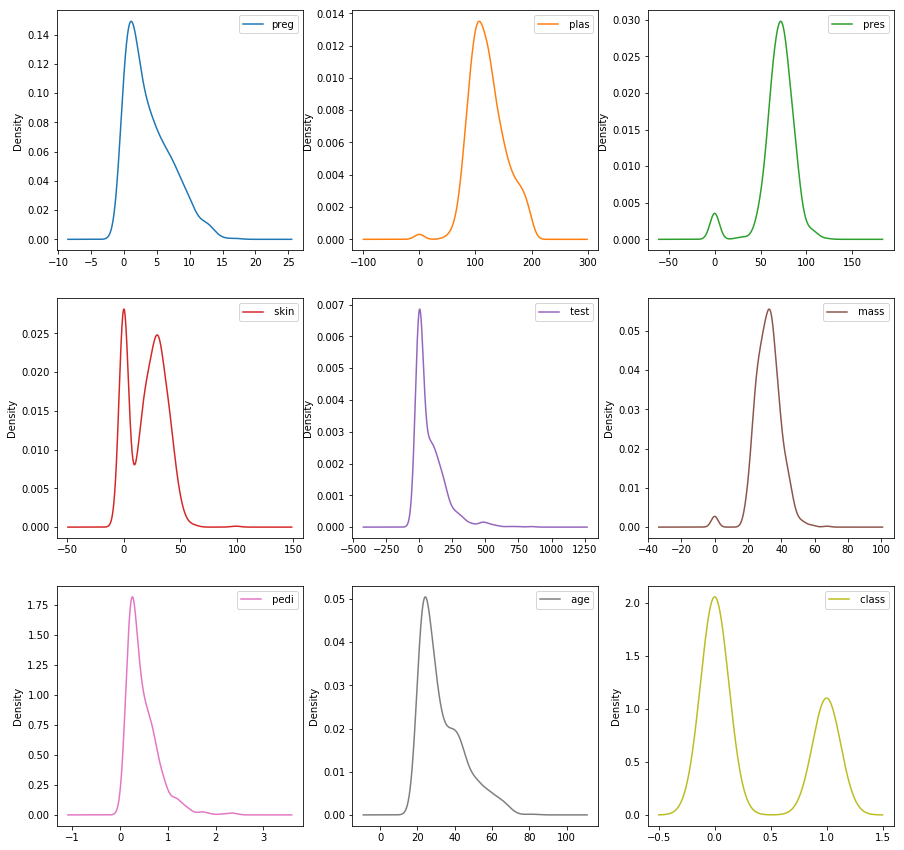

In [5]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))

#### Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short.

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

preg         AxesSubplot(0.125,0.657941;0.227941x0.222059)
 plas     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
 pres     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
 skin        AxesSubplot(0.125,0.391471;0.227941x0.222059)
 test     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
 mass     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
 pedi           AxesSubplot(0.125,0.125;0.227941x0.222059)
 age         AxesSubplot(0.398529,0.125;0.227941x0.222059)
 class       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

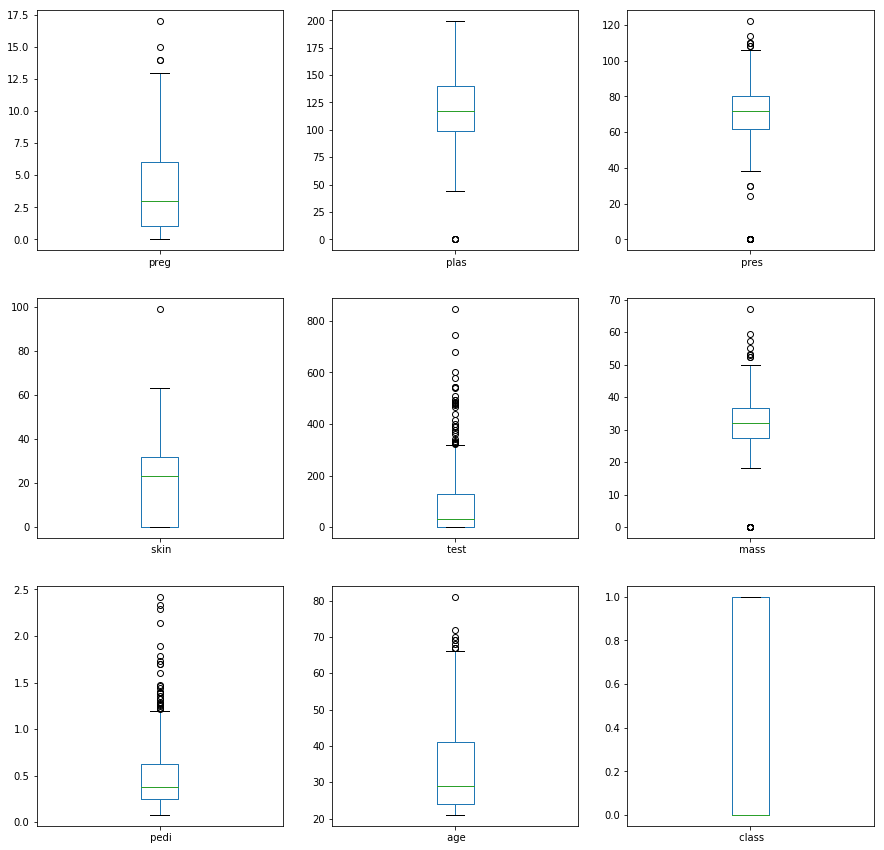

In [6]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))

#### Scatterplot Matrix

A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix.

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

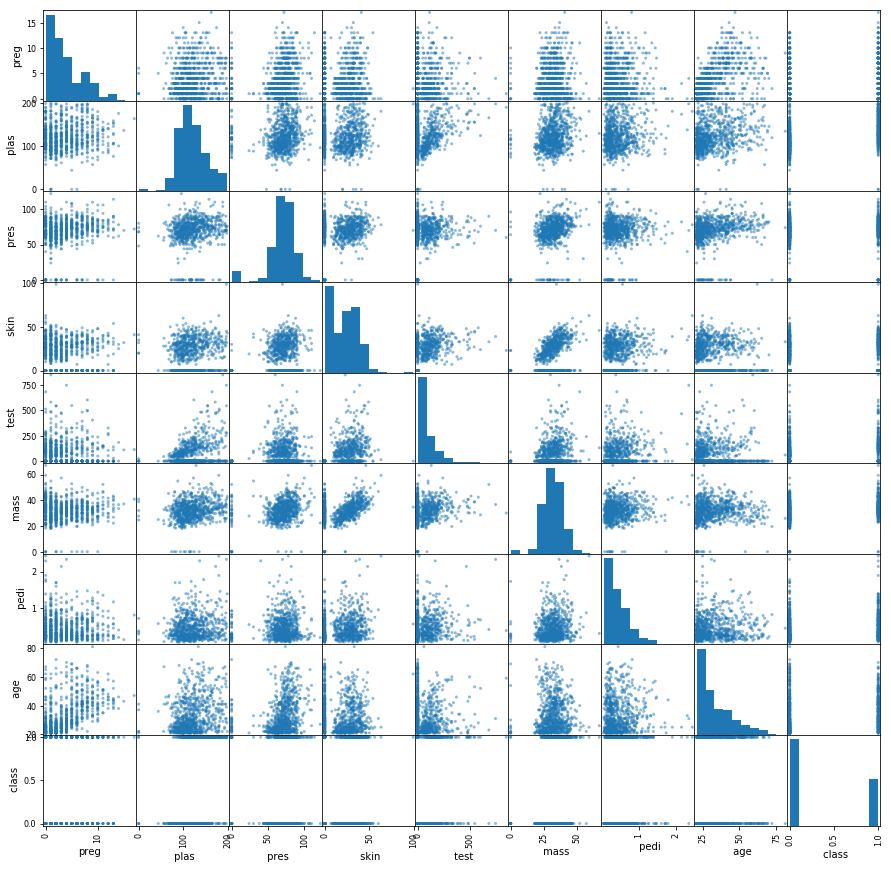

In [7]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df ,figsize=(15,15))
plt.show()

### Task 3.1-1

1. Calculate for each column a few univariate statistics (e.g., mean, variance, minimum, etc.).
* Calculate a correlation matrix.

In [8]:
# Calculate for each column a few univariate statistics (e.g., mean, variance, minimum, etc.).
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Calculate a correlation matrix.
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.
You can calculate the correlation between each pair of attributes. This is called a correlation matrix. Highly correlated values are good candidates for removal from the dataset.